# Use of Force in Austin

### This is a dataset from the center for policing equality, uploaded to Kaggle (https://www.kaggle.com/center-for-policing-equity/data-science-for-good).  

### Kaggle Competion Problem statement:
#### How do you measure justice? And how do you solve the problem of racism in policing? We look for factors that drive racial disparities in policing by analyzing census and police department deployment data. The ultimate goal is to inform police agencies where they can make improvements by identifying deployment areas where racial disparities exist and are not explainable by crime rates and poverty levels.

#### Our biggest challenge is automating the combination of police data, census-level data, and other socioeconomic factors. Shapefiles are unusual and messy -- which makes it difficult to, for instance, generate maps of police behavior with precinct boundary layers mixed with census layers. Police incident data are also very difficult to normalize and standardize across departments since there are no federal standards for data collection.

#### I will be using this dataset to practice working with shapefiles and dataframes

## Working with the shapefiles
Import required libraries and read in shapefile and Use of Force (UoF) data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import os

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff

import geopandas as gpd

init_notebook_mode(connected=True)
%matplotlib inline

(9483, 29)
      RIN  PRIMARY_KEY  INCIDENT_DATE LOCATION_DISTRICT    INCIDENT_REASON  \
0     RIN  Primary Key  Date Occurred      Area Command  Nature of Contact   
1  156701   2015541517      2/24/2015                FR     VIEWED OFFENSE   
2  161046  20151510003      5/31/2015                GE     VIEWED OFFENSE   
3  161381  20151510003      5/31/2015                GE     VIEWED OFFENSE   
4  142588   2014111929      1/11/2014                HE       TRAFFIC STOP   

                         REASON_FOR_FORCE              SUBJECT_ID  \
0                             Reason Desc       Master Subject ID   
1  NECESSARY TO EFFECT ARREST / DETENTION   167510327: 2015541517   
2  NECESSARY TO EFFECT ARREST / DETENTION  459191174: 20151510003   
3         IN CUSTODY, MAINTAINING CONTROL  459191174: 20151510003   
4   NECESSARY TO DEFEND REPORTING OFFICER   198377769: 2014111929   

  SUBJECT_GENDER SUBJECT_RACE  SUBJECT_ROLE        ...          \
0    Subject Sex         Race  Subject 

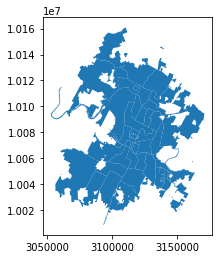

In [4]:
filepath  = r'C:\Users\Laura\OneDrive\Kaggle\data-science-for-good\Dept_37-00027'
atx_uof = pd.read_csv(filepath + '\\37-00027_UOF-P_2014-2016_prepped.csv')

map_filepath = (filepath +'\\37-00027_Shapefiles\APD_DIST.shp')

atx_map = gpd.read_file(map_filepath)

print(atx_uof.shape)
print(atx_uof.head())
atx_map.plot()

In [16]:
atx_uof = atx_uof.drop(atx_uof.index[0])

In [19]:
atx_uof['LOCATION_LATITUDE'].unique()

array([nan, '30.2669', '30.19693', '30.267346', '30.307201', '30.411555',
       '30.274242', '30.334982', '30.270847', '30.388491', '30.304577',
       '30.338618', '30.267363', '30.267431', '30.267442', '30.318499',
       '30.265895', '30.287932', '30.267899', '30.267011', '30.212858',
       '30.252241', '30.207908', '30.178379', '30.267299', '30.402336',
       '30.270393', '30.266989', '30.31251', '30.270012', '30.253201',
       '30.371749', '30.266739', '30.237305', '30.270196', '30.263775',
       '30.320428', '30.297303', '30.329685', '30.228893', '30.194171',
       '30.267056', '30.240015', '30.267644', '30.267624', '30.196836',
       '30.274993', '30.182167', '30.23567', '30.226504', '30.289047',
       '30.296985', '30.28946', '30.319658', '30.14774', '30.363177',
       '30.351258', '30.342184', '30.343475', '30.367685', '30.268139',
       '30.270918', '30.316824', '30.412048', '30.274515', '30.271776',
       '30.214108', '30.370107', '30.202311', '30.27381', '30.4277

As we're interested in combining this with the location data, we can remove any rows that do not have longitude or latitude info. Additionally, we should make sure the longitude and latitude are numerical values.

In [23]:
atx_uof = atx_uof.dropna(subset=['LOCATION_LATITUDE', 'LOCATION_LONGITUDE'])
atx_uof[['LOCATION_LATITUDE', 'LOCATION_LONGITUDE']] = atx_uof[['LOCATION_LATITUDE','LOCATION_LONGITUDE']].apply(pd.to_numeric)